Bench v1 stats: 
For 500 events processed
Average duration: 23197.24 microseconds.
50th percentile of duration: 20543.00 microseconds.
90th percentile of duration: 29563.20 microseconds.
99th percentile of duration: 61140.11 microseconds.
Interquartile range: (7391.75, 34779.75).
Number of outliers: 1004 from 20000 rows.
Correlation between start time (id) and duration is 0.09.

Bench v2 stats: 
For 500 events processed
Average duration: 21108.00 microseconds.
50th percentile of duration: 16918.00 microseconds.
90th percentile of duration: 23411.20 microseconds.
99th percentile of duration: 141512.94 microseconds.
Interquartile range: (7531.25, 27173.25).
Number of outliers: 1075 from 20000 rows.
Correlation between start time (id) and duration is 0.10.


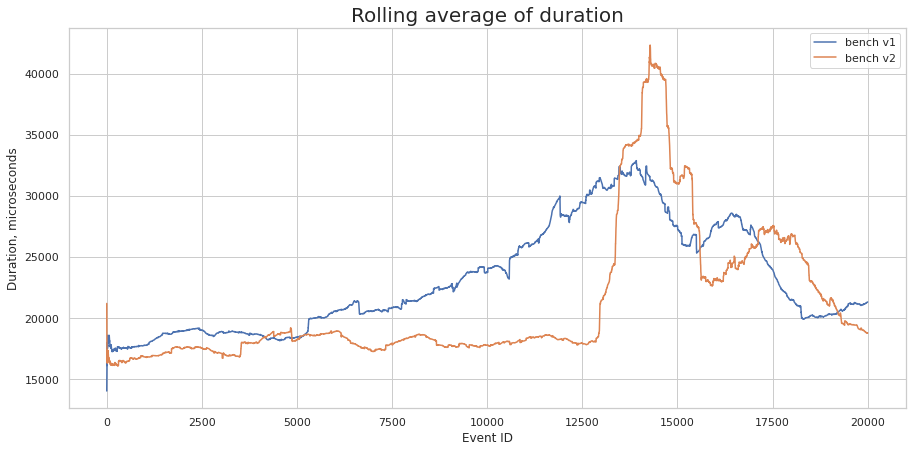

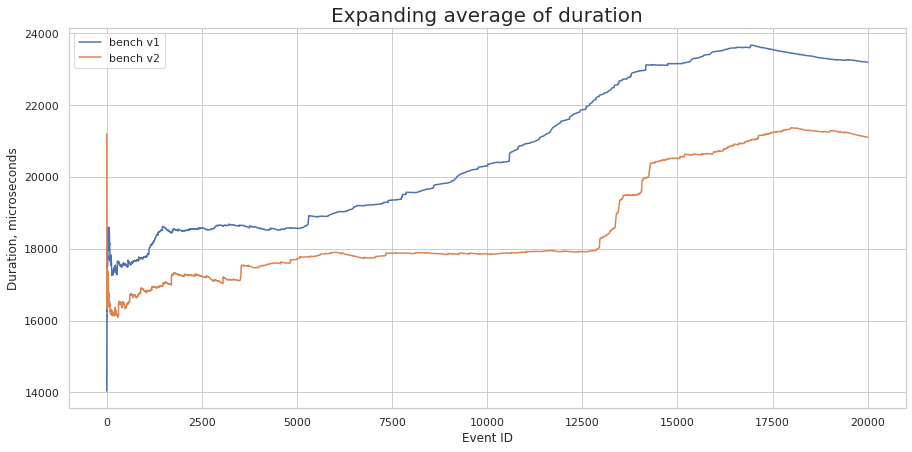

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def bench_stats(df):
  df['id'] = df.index

  print(f"For {df.events_processed[0]} events processed")
  print(f"Average duration: {df.duration.mean():.2f} microseconds.")
  print(f"50th percentile of duration: {df.duration.quantile(0.5):.2f} microseconds.")
  print(f"90th percentile of duration: {df.duration.quantile(0.9):.2f} microseconds.")
  print(f"99th percentile of duration: {df.duration.quantile(0.99):.2f} microseconds.")

  Q1 = df.duration.quantile(0.25)
  Q3 = df.duration.quantile(0.75)
  IQR = Q3 - Q1

  upper_bound = Q3+(1.5*IQR)
  lower_bound = Q1-(1.5*IQR)
  print(f"Interquartile range: ({lower_bound:.2f}, {upper_bound:.2f}).")
  count = len([elem for elem in df.duration if elem < lower_bound or elem > upper_bound])
  print(f"Number of outliers: {count} from {len(df)} rows.")
  #print(df.sort_values('duration', ascending=False).head())
  print(f"Correlation between start time (id) and duration is {df['duration'].corr(df['id']):.2f}.")

header_list = ["start", "duration", "events_processed"]
filename_v1 = "bench_v1"
filename_v2 = "bench_v2"
df1 = pd.read_csv(filename_v1, names=header_list, parse_dates=True)
df2 = pd.read_csv(filename_v2, names=header_list, parse_dates=True)

print("Bench v1 stats: ")
bench_stats(df1)
print("\nBench v2 stats: ")
bench_stats(df2)

fig, ax = plt.subplots(figsize=(15,7))
window = int(len(df1)/15)
ax = df1.duration.rolling(window, min_periods=1).mean().plot(label='bench v1')
ax = df2.duration.rolling(window, min_periods=1).mean().plot(label='bench v2')
ax.set_xlabel('Event ID')
ax.set_ylabel('Duration, microseconds')
ax.set_title('Rolling average of duration', fontsize=20)
ax.legend()

plt.show()

fig, ax = plt.subplots(figsize=(15,7))
ax = df1.duration.expanding().mean().plot(label='bench v1')
ax = df2.duration.expanding().mean().plot(label='bench v2')
ax.set_xlabel('Event ID')
ax.set_ylabel('Duration, microseconds')
ax.set_title('Expanding average of duration', fontsize=20)
ax.legend()

plt.show()
